# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [13]:
%matplotlib inline
from scipy import stats
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [28]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


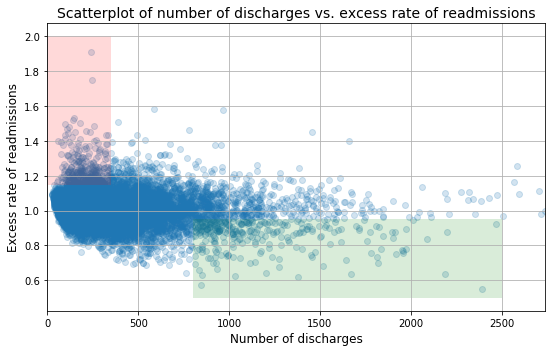

In [29]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [ ]:
Overall rate of readmission is trending down with increasing number of discharges, however, the relationship is very
weak with an r-value of -0.09. As such, it is misleading to say that lower number of discharges brings a greater incidence of excess
rate readmissions and that higher number of discharges brings a greater incidence of lower rates of readmissions 



+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 


In [12]:
from scipy import stats
import numpy as np

stats.linregress(x, y)

NameError: name 'x' is not defined

In [ ]:
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [23]:
df = clean_hospital_read_df
index_list = list(range(len(df.index)))
# make index series a column in dataframe
df['index'] = index_list
# set index column as index of dataframe
df = df.set_index(['index'])
df['Excess Readmission Ratio']  = df['Excess Readmission Ratio'].replace(np.NaN, 'missing')
df['Excess Readmission Ratio']  = df['Excess Readmission Ratio'].replace(np.NaN, 'missing')

df = df.loc[df['Excess Readmission Ratio'] != "NaN"]
masks = df['Number of Discharges'] < 100
df = df[masks]
masks = df['Excess Readmission Ratio'] != "missing"
df = df[masks]
readmission_mean = df['Excess Readmission Ratio'].mean()
greater_one = df[df['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()
total = df['Excess Readmission Ratio'].count()
pct = greater_one / total
pct

NameError: name 'clean_hospital_read_df' is not defined

In [32]:
mask = df != "missing"
df[mask]
stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])


(-0.24463550033476256, 1.1955927845532681e-17)

In [33]:
df = clean_hospital_read_df
index_list = list(range(len(df.index)))
# make index series a column in dataframe
df['index'] = index_list
# set index column as index of dataframe
df = df.set_index(['index'])
df['Excess Readmission Ratio']  = df['Excess Readmission Ratio'].replace(np.NaN, 'missing')
df = df.loc[df['Excess Readmission Ratio'] != "NaN"]
masks = df['Number of Discharges'] > 1000
df = df[masks]
masks = df['Excess Readmission Ratio'] != "missing"
df = df[masks]
readmission_mean = df['Excess Readmission Ratio'].mean()
greater_one = df[df['Excess Readmission Ratio'] > 1]['Excess Readmission Ratio'].count()
total = df['Excess Readmission Ratio'].count()
pct = greater_one / total
print (readmission_mean)
print (pct)

0.978335421166
0.444924406048


In [ ]:
look by state?
look at expected and predicted readmission rates?

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [ ]:
5. One advantage is that you can sort of see where the data is centered/clustered. 

In [36]:
clean_hospital_read_df["Measure Name"].value_counts()

READM-30-HF-HRRP          2841
READM-30-PN-HRRP          2799
READM-30-COPD-HRRP        2738
READM-30-AMI-HRRP         1807
READM-30-HIP-KNEE-HRRP    1393
Name: Measure Name, dtype: int64

In [20]:
clean_hospital_read_df["Hospital Name"].value_counts()

GOOD SAMARITAN HOSPITAL                               30
ST JOSEPH HOSPITAL                                    26
MEMORIAL HOSPITAL                                     23
ST MARY'S MEDICAL CENTER                              23
MERCY MEDICAL CENTER                                  23
ST JOSEPH MEDICAL CENTER                              21
MERCY HOSPITAL                                        21
ST MARYS HOSPITAL                                     18
ST MARY MEDICAL CENTER                                17
ST LUKES HOSPITAL                                     15
DOCTORS HOSPITAL                                      14
SAINT FRANCIS MEDICAL CENTER                          14
ST VINCENT HOSPITAL                                   14
ST FRANCIS HOSPITAL                                   13
SACRED HEART HOSPITAL                                 13
ST JOSEPH'S HOSPITAL                                  12
NEWTON MEDICAL CENTER                                 12
NORTHWEST MEDICAL CENTER       

Measure Name
READM-30-AMI-HRRP         1807
READM-30-COPD-HRRP        2738
READM-30-HF-HRRP          2841
READM-30-HIP-KNEE-HRRP    1393
READM-30-PN-HRRP          2799
Name: Hospital Name, dtype: int64

In [41]:

hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df['Excess Readmission Ratio']  = hospital_read_df['Excess Readmission Ratio'].replace(np.NaN, 'missing')
mask = hospital_read_df['Excess Readmission Ratio'] != "missing"
hospital_read_df = hospital_read_df[mask]
ami = hospital_read_df[hospital_read_df['Measure Name'] == "READM-30-AMI-HRRP"]
copd = hospital_read_df[hospital_read_df['Measure Name'] == "READM-30-COPD-HRRP"]
hf = hospital_read_df[hospital_read_df['Measure Name'] == "READM-30-HF-HRRP"]
hip = hospital_read_df[hospital_read_df['Measure Name'] == "READM-30-HIP-KNEE-HRRP"]
pn = hospital_read_df[hospital_read_df['Measure Name'] == "READM-30-PN-HRRP"]
#ami = hospital_read_df[mask]


ami1 = ami['Excess Readmission Ratio'].value_counts().reset_index().rename(columns={'index': 'Per Hospital'})
copd1 = copd['Excess Readmission Ratio'].value_counts().reset_index().rename(columns={'index': 'Per Hospital'})
hf1 = hf['Excess Readmission Ratio'].value_counts().reset_index().rename(columns={'index': 'Per Hospital'})  
hip1 = hip['Excess Readmission Ratio'].value_counts().reset_index().rename(columns={'index': 'Per Hospital'})
pn1 = pn['Excess Readmission Ratio'].value_counts().reset_index().rename(columns={'index': 'Per Hospital'})


amic = stats.pearsonr(ami1['Per Hospital'], ami1['Excess Readmission Ratio'])
copdc = stats.pearsonr(copd1['Per Hospital'], copd1['Excess Readmission Ratio'])
hfc = stats.pearsonr(hf1['Per Hospital'], hf1['Excess Readmission Ratio'])
hipc = stats.pearsonr(hip1['Per Hospital'], hip1['Excess Readmission Ratio'])
pnc = stats.pearsonr(pn1['Per Hospital'], pn1['Excess Readmission Ratio'])
print ("ami", amic)
print ("copd", copdc)
print ("hf", hfc)
print ("hip", hipc)
print ("pn", pnc)

ami (-0.027002788972809538, 0.29709343536835808)
copd (-0.098474398403497684, 5.0369389330651091e-05)
hf (-0.0087969369825787042, 0.70276875044851939)
hip (-0.053840085225524484, 0.016993277397095472)
pn (-0.074574856289490093, 0.0013238591259838877)


In [42]:
hospital_read_df['Excess Readmission Ratio'] = hospital_read_df['Excess Readmission Ratio'].astype(float)

In [52]:
grouped = hospital_read_df.groupby('State')

In [53]:
grouped.mean()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
State,,,,,,
AK,20014.027027,NaN,0.985732,14.562162,14.913514,26.409091
AL,10076.650943,NaN,1.015037,16.864780,16.722327,55.254613
AR,40052.806630,NaN,1.026488,16.927624,16.521547,56.358824
AZ,30067.719665,NaN,0.997050,15.746862,15.849791,47.257282
CA,50331.594190,NaN,0.992583,17.487236,17.554137,50.682744
CO,60046.279188,NaN,0.955072,14.458883,15.217766,32.576923
CT,70019.304348,NaN,1.021630,17.282609,16.935507,82.523810
DC,90005.387097,NaN,1.085581,18.219355,17.103226,66.655172
DE,80005.000000,NaN,0.972963,16.163333,16.716667,113.925926


In [10]:
ami1

,Per Hospital,Excess Readmission Ratio
0,0.9772,7
1,0.9842,7
2,1.0238,6
3,0.9870,5
4,1.0152,5
5,1.0334,5
6,0.9926,5
7,0.9837,5
8,0.9578,5
9,0.9614,5


In [7]:
new_frames

[      Excess Readmission Ratio  Excess Readmission Ratio
 0                       0.9772                         7
 1                       0.9842                         7
 2                       1.0238                         6
 3                       0.9870                         5
 4                       1.0152                         5
 5                       1.0334                         5
 6                       0.9926                         5
 7                       0.9837                         5
 8                       0.9578                         5
 9                       0.9614                         5
 10                      0.9694                         5
 11                      1.0724                         5
 12                      0.9860                         5
 13                      0.9830                         4
 14                      0.9670                         4
 15                      1.0189                         4
 16           

In [73]:
new_df

Measure Name       Excess Readmission Ratio
READM-30-AMI-HRRP  0.9772                      7
                   0.9842                      7
                   1.0238                      6
                   0.9578                      5
                   0.9614                      5
                   0.9694                      5
                   0.9837                      5
                   0.9860                      5
                   0.9870                      5
                   0.9926                      5
                   1.0152                      5
                   1.0334                      5
                   1.0724                      5
                   0.9129                      4
                   0.9207                      4
                   0.9291                      4
                   0.9383                      4
                   0.9496                      4
                   0.9609                      4
                   0.9634

In [79]:
ami = hospital_read_df.groupby(['Measure Name'] == "READM-30-AMI-HRRP")['Excess Readmission Ratio'].value_counts()

KeyError: False

In [102]:
df_grouped = hospital_read_df.groupby(by = ['Measure Name'])
#df_grouped.set_index(['Excess Readmission Ratio']).unstack(level=0)
df_grouped['Excess Readmission Ratio'].value_counts()

Measure Name       Excess Readmission Ratio
READM-30-AMI-HRRP  0.9772                      7
                   0.9842                      7
                   1.0238                      6
                   0.9578                      5
                   0.9614                      5
                   0.9694                      5
                   0.9837                      5
                   0.9860                      5
                   0.9870                      5
                   0.9926                      5
                   1.0152                      5
                   1.0334                      5
                   1.0724                      5
                   0.9129                      4
                   0.9207                      4
                   0.9291                      4
                   0.9383                      4
                   0.9496                      4
                   0.9609                      4
                   0.9634

In [98]:
df_grouped = hospital_read_df.groupby(by = ['Measure Name'])['Excess Readmission Ratio'].value_counts()
#df_grouped.set_index(['Excess Readmission Ratio']).unstack(level=0)
df_grouped['Excess Readmission Ratio']

KeyError: 'Excess Readmission Ratio'

In [ ]:
df_grouped = df.groupby(
        by=['first_column', 'second_column']
    )['third_column'].mean().reset_index(name='mean_values_grouped')